In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np

## Comparison of Nonparametric & Maximum Likelihood Gini Estimators
Pg. 244

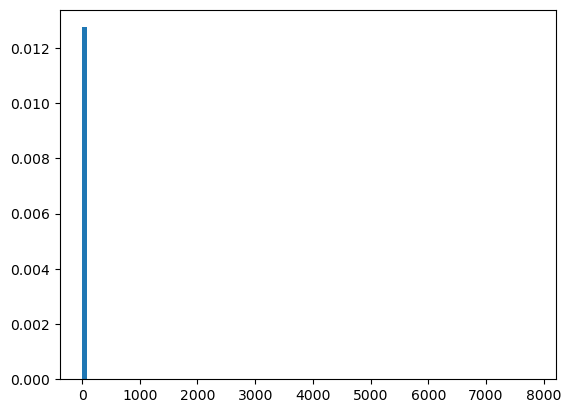

In [2]:
alpha = 1.1
x = (
    np.random.pareto(alpha, 10**3) + 1
)  # Generate 1000 random values from a Pareto distribution with alpha = 1.1

count, bins, ignored = plt.hist(
    x, 100, density=True
)  # Plot the histogram of the generated values
plt.show()

In [3]:
def MLGini(x):
    beta = min(x)
    n = len(x)
    y = sum(np.log(x))
    alpha = n / (y - n * np.log(beta))
    return 1 / (2 * alpha - 1)

In [4]:
def nonParmGini(x):
    n = len(x)
    sumx = (n - 1) * sum(x)
    y = 0
    for i in range(0, n):
        for j in range(i, n):
            y = abs(x[i] - x[j]) + y
    return y / sumx

In [5]:
mls = []
nps = []
monte_carlo_sims = 10**3
num_obs = 10**3
for i in range(0, monte_carlo_sims):
    x = np.random.pareto(alpha, num_obs) + 1
    mls.append(MLGini(x))
    nps.append(nonParmGini(x))
print("NonPar Mean: ", sum(nps) / len(nps))
print("ML Mean: ", sum(mls) / len(mls))

NonPar Mean:  0.7114280050637444
ML Mean:  0.8326187564360307


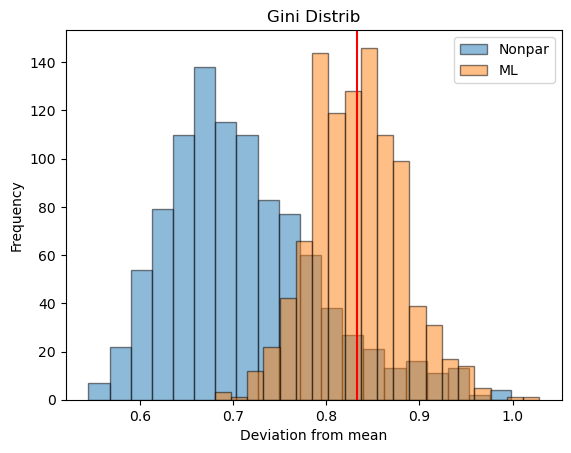

In [18]:
fig, ax = plt.subplots()

ax.hist(nps, bins=20, alpha=0.5, label='Nonpar', edgecolor='black')
ax.hist(mls, bins=20, alpha=0.5, label='ML', edgecolor='black')
ax.axvline(x=.8333, color='red')


ax.legend()
ax.set_xlabel('Deviation from mean')
ax.set_ylabel('Frequency')
ax.set_title('Gini Distrib')
plt.show()